<a href="https://colab.research.google.com/github/BlackBoyZeus/WeightWatcher/blob/master/examples/WeightWatcher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WeightWatcher  

### Basic Functionality

https://calculationconsulting.com

In [1]:
# Suppress the powerlaw package warnings
# "powerlaw.py:700: RuntimeWarning: divide by zero encountered in true_divide"
# "powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide"
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import sys
if 'google.colab' in sys.modules:
    !pip install weightwatcher

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.1/80.1 kB 2.4 MB/s eta 0:00:00


## 1. Quick start example

### 1.1 Import your model (Keras or PyTorch)

In [4]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import vgg16

kmodel = vgg16.VGG16
model = kmodel(weights='imagenet')

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


### 1.2 Run WeightWatcher

In [5]:
import weightwatcher as ww
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(ww.__name__)
logger.setLevel(logging.INFO)


In [6]:

watcher = ww.WeightWatcher(model=model)
details = watcher.analyze()

INFO:weightwatcher:

python      version 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
numpy       version 1.26.4
tensorflow version 2.17.0

INFO:weightwatcher:

python      version 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
numpy       version 1.26.4
tensorflow version 2.17.0

INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'fft': False, 'conv2d_fft': False, 'ww2x': False, 'pool': True, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'fast', 'fix_fingers': False, 'fit': 'power_law', 'MAX_FINGERS': 10, 'finger_thresh': 1.0, 'sparsify': True, 'detX': False, 'mp_fit': False, 'min_evals': 10, 'max_evals': 15000, 'max_N': 50000, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'xmin_max': None, 'pl_package': 'ww', '

In [7]:
details

,layer_id,name,D,M,N,Q,alpha,alpha_weighted,entropy,has_esd,...,sigma,spectral_norm,stable_rank,status,sv_max,sv_min,warning,weak_rank_loss,xmax,xmin
0,1,block1_conv1,0.189501,3,64,21.333333,17.964401,10.586237,0.851586,True,...,6.925688,3.884094,9.505241,success,1.970810,6.904261e-01,under-trained,0,3.884094,3.344869
1,2,block1_conv2,0.099411,64,64,1.000000,1.233437,0.144255,0.728762,True,...,0.011897,1.309042,25.746554,success,1.144134,1.570639e-04,over-trained,44,1.309042,0.000046
2,4,block2_conv1,0.089209,64,128,2.000000,5.218346,0.447861,0.800430,True,...,0.797192,1.218496,31.414472,success,1.103855,9.552398e-03,,0,1.218496,0.477076
3,5,block2_conv2,0.071233,128,128,1.000000,4.916920,-1.311546,0.885675,True,...,0.652820,0.541076,75.523238,success,0.735579,6.550567e-04,,21,0.541076,0.266994
4,7,block3_conv1,0.064909,128,256,2.000000,2.411648,-0.284960,0.914160,True,...,0.100069,0.761799,58.446486,success,0.872811,1.522300e-02,,0,0.761799,0.067426
5,8,block3_conv2,0.081294,256,256,1.000000,2.931934,-0.832555,0.973355,True,...,0.163865,0.520043,86.464096,success,0.721140,1.407106e-04,,38,0.520043,0.088556
6,9,block3_conv3,0.061629,256,256,1.000000,2.989979,-1.034300,0.993484,True,...,0.150428,0.450897,105.269552,success,0.671489,4.518723e-04,,23,0.450897,0.076317
7,11,block4_conv1,0.070437,256,512,2.000000,6.261049,-2.323427,1.012404,True,...,0.821638,0.425508,140.337333,success,0.652310,1.951619e-02,under-trained,0,0.425508,0.202395
8,12,block4_conv2,0.046917,512,512,1.000000,3.018556,-1.087909,1.135652,True,...,0.129225,0.436107,157.853079,success,0.660384,2.553803e-04,,46,0.436107,0.066435
9,13,block4_conv3,0.036842,512,512,1.000000,3.076449,-0.880066,1.150341,True,...,0.127077,0.517529,145.783110,success,0.719395,1.806136e-04,,37,0.517529,0.061605


In [8]:
watcher.get_summary(details)

{'log_norm': 1.894152340498664,
 'alpha': 4.233657339082294,
 'alpha_weighted': 0.4541430531457382,
 'log_alpha_norm': 1.2530180748808226,
 'log_spectral_norm': 0.041289449728164396,
 'stable_rank': 94.64391840493165}

## 2. Advanced examples

## 2.1 Filter by layer type (CONV1D, CONV2D, DENSE)

In this example we are interested in the DENSE layers only

### BROKEN  for now

In [9]:
from tensorflow.keras.applications import vgg16

kmodel = vgg16.VGG16
model = kmodel(weights='imagenet')

watcher = ww.WeightWatcher(model=model)
details = watcher.analyze(layers=[ww.LAYER_TYPE.DENSE])
details

INFO:weightwatcher:

python      version 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
numpy       version 1.26.4
tensorflow version 2.17.0

INFO:weightwatcher:

python      version 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
numpy       version 1.26.4
tensorflow version 2.17.0

INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'fft': False, 'conv2d_fft': False, 'ww2x': False, 'pool': True, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'fast', 'fix_fingers': False, 'fit': 'power_law', 'MAX_FINGERS': 10, 'finger_thresh': 1.0, 'sparsify': True, 'detX': False, 'mp_fit': False, 'min_evals': 10, 'max_evals': 15000, 'max_N': 50000, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'xmin_max': None, 'pl_package': 'ww', '

,layer_id,name,D,M,N,Q,alpha,alpha_weighted,entropy,has_esd,...,sigma,spectral_norm,stable_rank,status,sv_max,sv_min,warning,weak_rank_loss,xmax,xmin
0,20,fc1,0.027346,4096,25088,6.125,2.107102,1.689530,1.106900,True,...,0.023966,6.336165,86.676815,success,2.517174,1.159824e-01,,0,6.336165,0.050573
1,21,fc2,0.032421,4096,4096,1.000,2.033857,1.816351,1.067917,True,...,0.028159,7.817311,41.578633,success,2.795945,9.829789e-10,,22,7.817311,0.043260
2,22,predictions,0.026332,1000,4096,4.096,3.030404,2.868678,0.943301,True,...,0.266605,8.843657,31.760591,success,2.973829,6.500224e-04,,1,8.843657,0.972452


## 2.2 Filter by multiple layer types

In this example we are interested in the CONV1D and DENSE layers.

Filter the layers using a bitmask.

In [10]:
import weightwatcher as ww

watcher = ww.WeightWatcher(model=model)

details = watcher.analyze(layers=[ww.LAYER_TYPE.CONV1D,ww.LAYER_TYPE.DENSE])
details

INFO:weightwatcher:

python      version 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
numpy       version 1.26.4
tensorflow version 2.17.0

INFO:weightwatcher:

python      version 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
numpy       version 1.26.4
tensorflow version 2.17.0

INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'fft': False, 'conv2d_fft': False, 'ww2x': False, 'pool': True, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'fast', 'fix_fingers': False, 'fit': 'power_law', 'MAX_FINGERS': 10, 'finger_thresh': 1.0, 'sparsify': True, 'detX': False, 'mp_fit': False, 'min_evals': 10, 'max_evals': 15000, 'max_N': 50000, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'xmin_max': None, 'pl_package': 'ww', '

,layer_id,name,D,M,N,Q,alpha,alpha_weighted,entropy,has_esd,...,sigma,spectral_norm,stable_rank,status,sv_max,sv_min,warning,weak_rank_loss,xmax,xmin
0,20,fc1,0.027346,4096,25088,6.125,2.107102,1.689530,1.106900,True,...,0.023966,6.336165,86.676815,success,2.517174,1.159824e-01,,0,6.336165,0.050573
1,21,fc2,0.032421,4096,4096,1.000,2.033857,1.816351,1.067917,True,...,0.028159,7.817311,41.578633,success,2.795945,9.829789e-10,,22,7.817311,0.043260
2,22,predictions,0.026332,1000,4096,4.096,3.030404,2.868678,0.943301,True,...,0.266605,8.843657,31.760591,success,2.973829,6.500224e-04,,1,8.843657,0.972452


## 2.3 Filter by layer Ids

In [11]:
watcher = ww.WeightWatcher(model=model)
details = watcher.analyze(layers=[20])
details

INFO:weightwatcher:

python      version 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
numpy       version 1.26.4
tensorflow version 2.17.0

INFO:weightwatcher:

python      version 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
numpy       version 1.26.4
tensorflow version 2.17.0

INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'fft': False, 'conv2d_fft': False, 'ww2x': False, 'pool': True, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'fast', 'fix_fingers': False, 'fit': 'power_law', 'MAX_FINGERS': 10, 'finger_thresh': 1.0, 'sparsify': True, 'detX': False, 'mp_fit': False, 'min_evals': 10, 'max_evals': 15000, 'max_N': 50000, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'xmin_max': None, 'pl_package': 'ww', '

,layer_id,name,D,M,N,Q,alpha,alpha_weighted,entropy,has_esd,...,sigma,spectral_norm,stable_rank,status,sv_max,sv_min,warning,weak_rank_loss,xmax,xmin
0,20,fc1,0.027346,4096,25088,6.125,2.107102,1.68953,1.1069,True,...,0.023966,6.336165,86.676815,success,2.517174,0.115982,,0,6.336165,0.050573


## 2.4 Plots

INFO:weightwatcher:

python      version 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
numpy       version 1.26.4
tensorflow version 2.17.0

INFO:weightwatcher:

python      version 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
numpy       version 1.26.4
tensorflow version 2.17.0

INFO:weightwatcher:Saving all images to ww-img
INFO:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': True, 'deltaEs': False, 'intra': False, 'channels': None, 'fft': False, 'conv2d_fft': False, 'ww2x': False, 'pool': True, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'fast', 'fix_fingers': False, 'fit': 'power_law', 'MAX_FINGERS': 10, 'finger_thresh': 1.0, 'sparsify': True, 'detX': False, 'mp_fit': False, 'min_evals': 10, 'max_evals': 15000, 'max_N': 50000, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'xmin_max': None, 'pl_package': 'ww', 'x

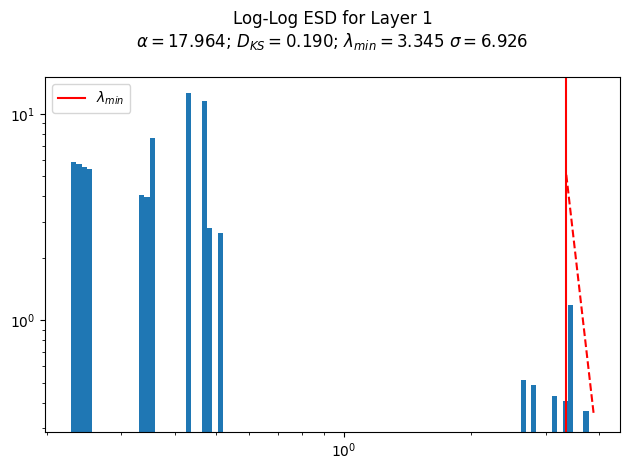

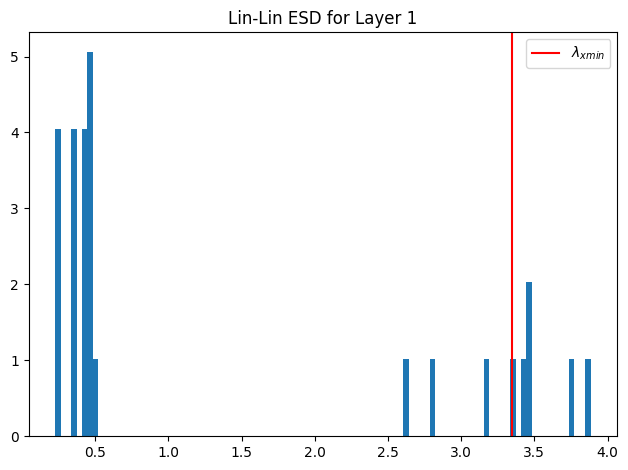

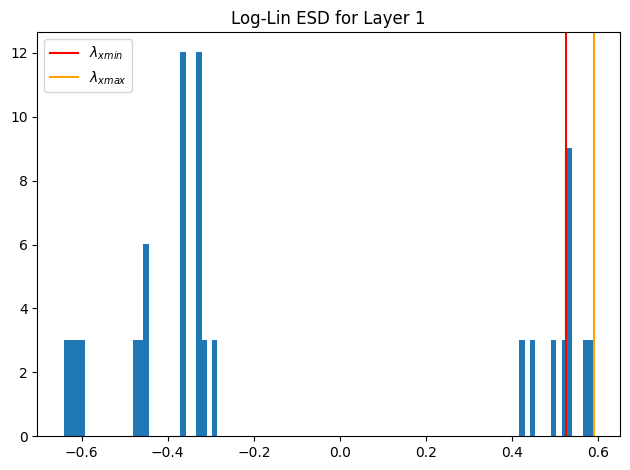

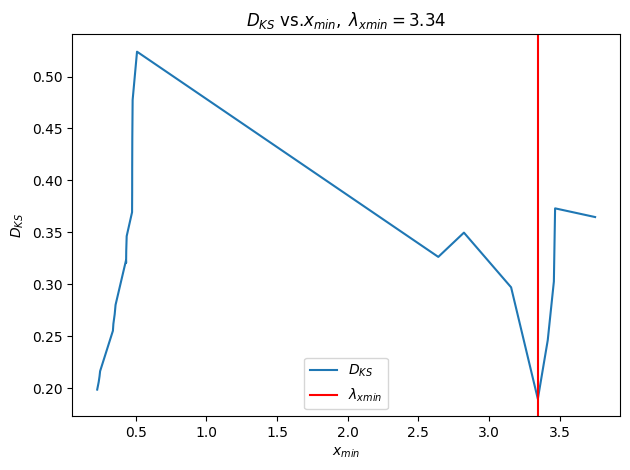

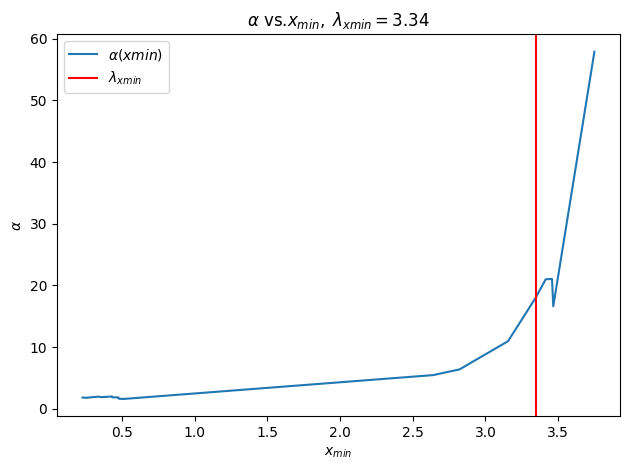

INFO:weightwatcher:Running powerlaw.Fit no xmin, xmax=None. distribution=power_law pl_package=ww
INFO:weightwatcher:PL FIT running NEW power law method


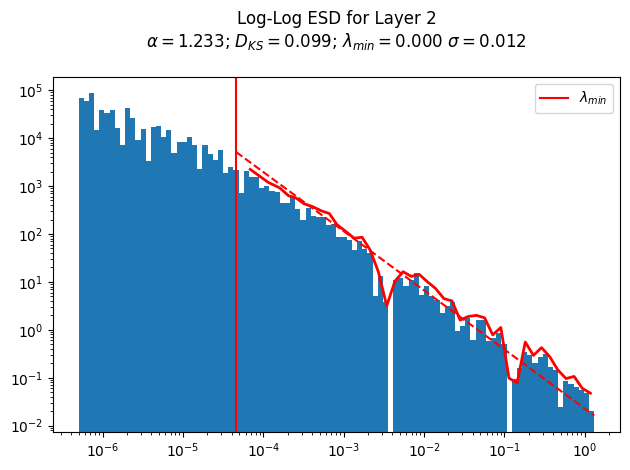

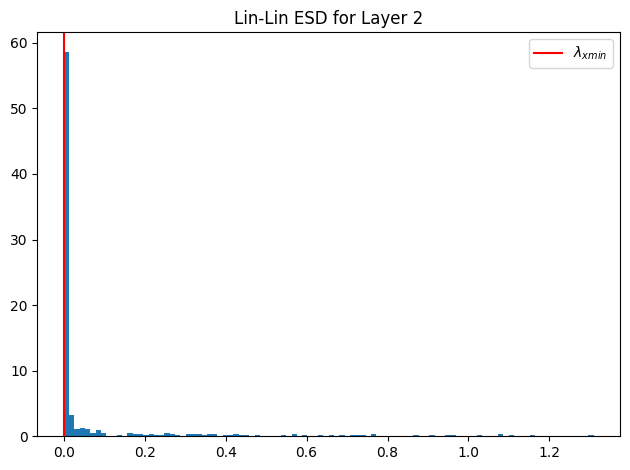

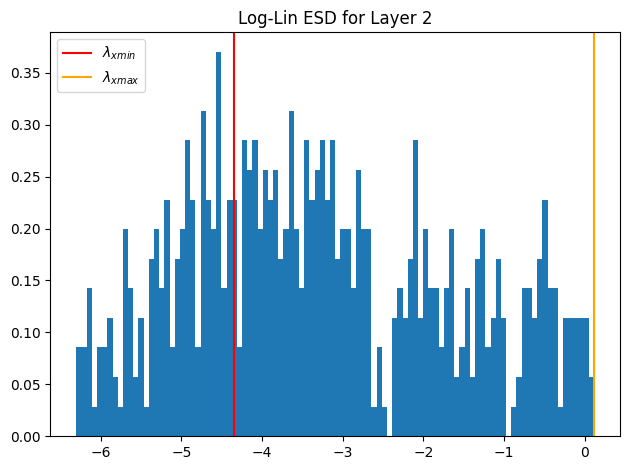

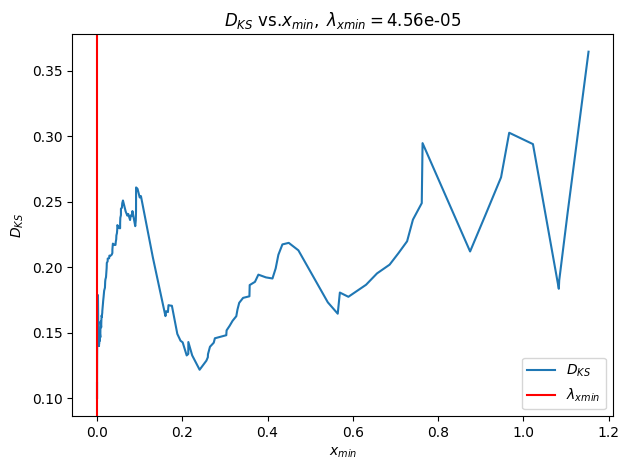

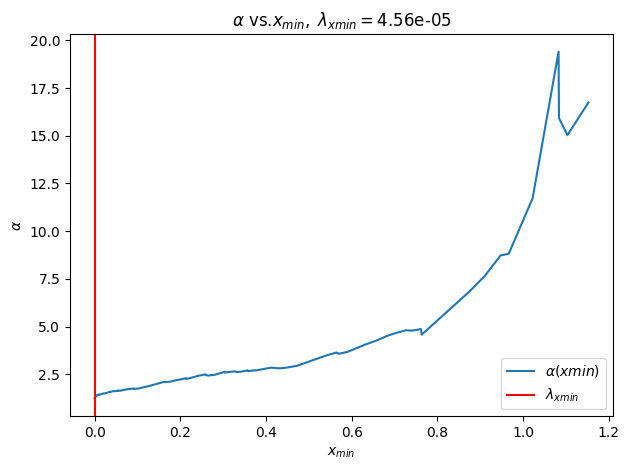

INFO:weightwatcher:keras layer: block1_pool <MaxPooling2D name=block1_pool, built=True>  type unknown not found 
INFO:weightwatcher:Running powerlaw.Fit no xmin, xmax=None. distribution=power_law pl_package=ww
INFO:weightwatcher:PL FIT running NEW power law method


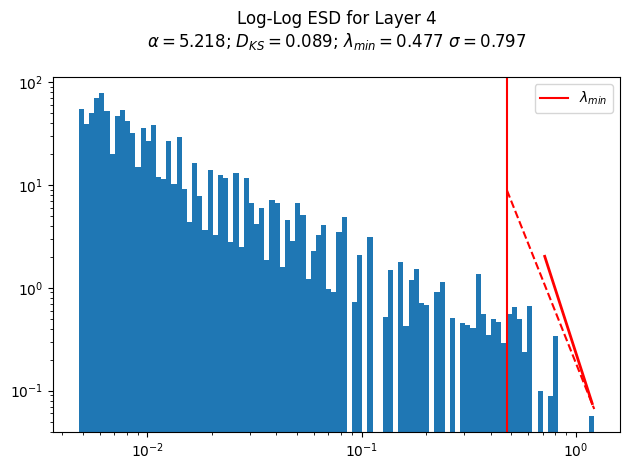

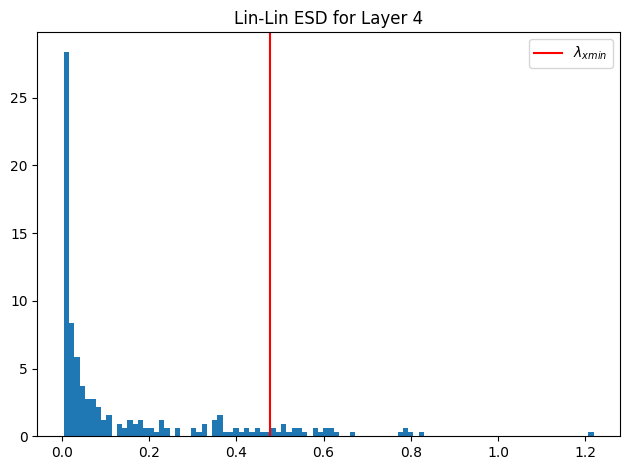

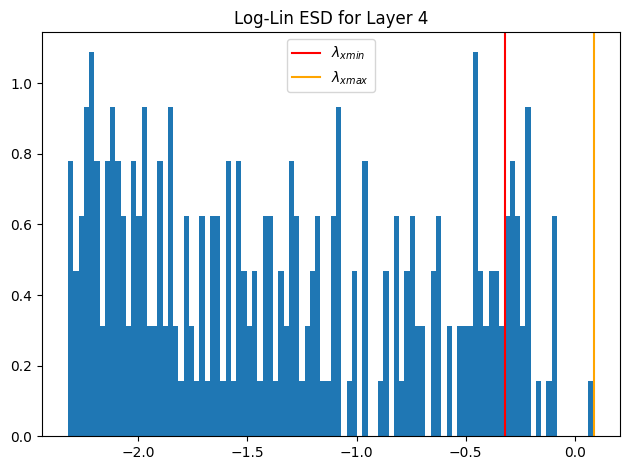

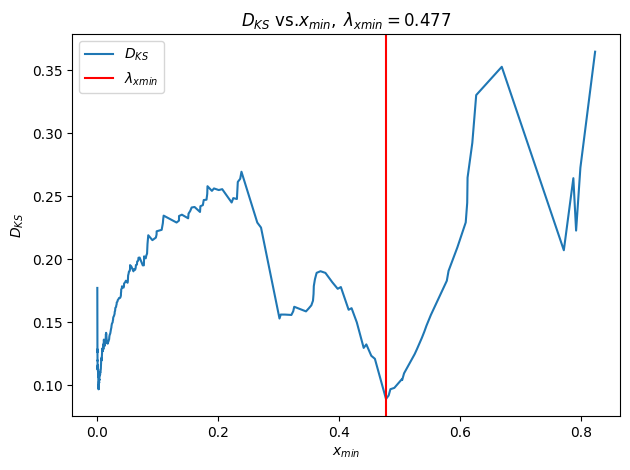

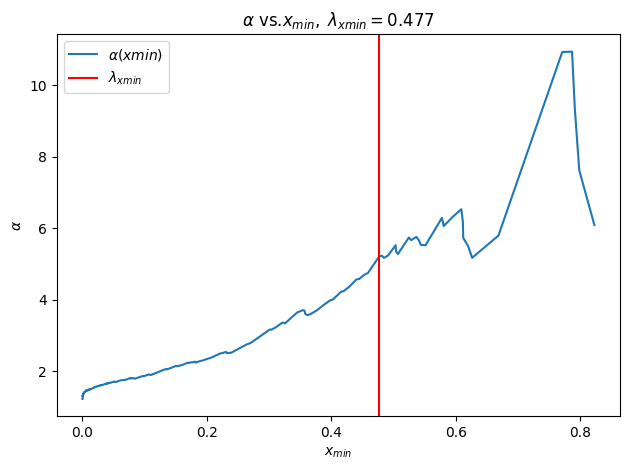

INFO:weightwatcher:Running powerlaw.Fit no xmin, xmax=None. distribution=power_law pl_package=ww
INFO:weightwatcher:PL FIT running NEW power law method


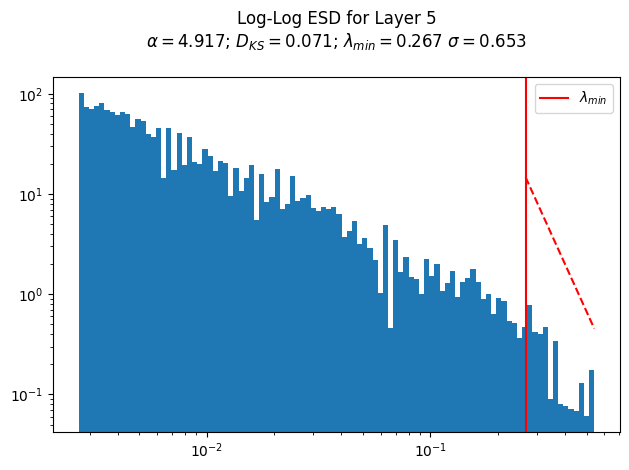

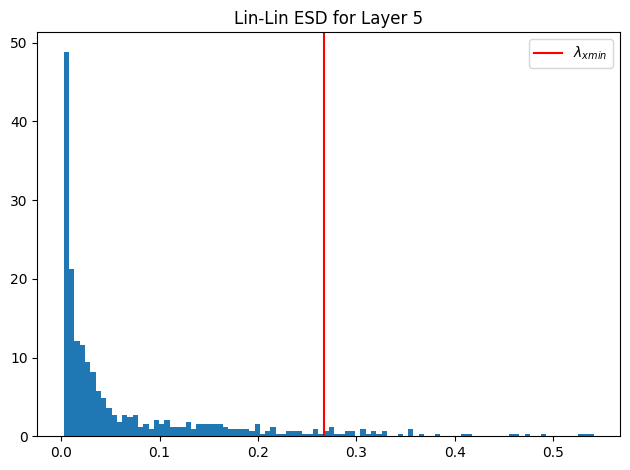

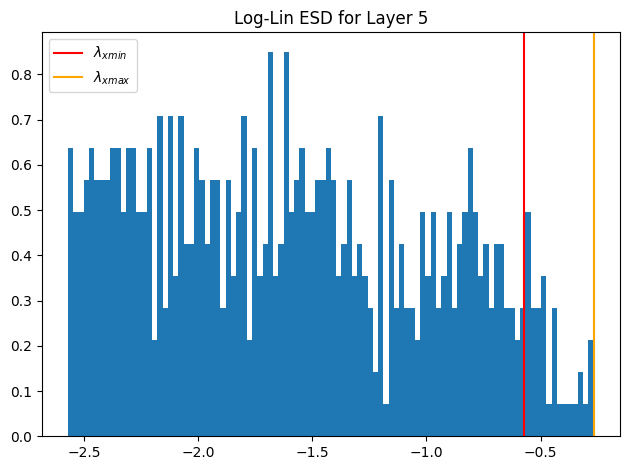

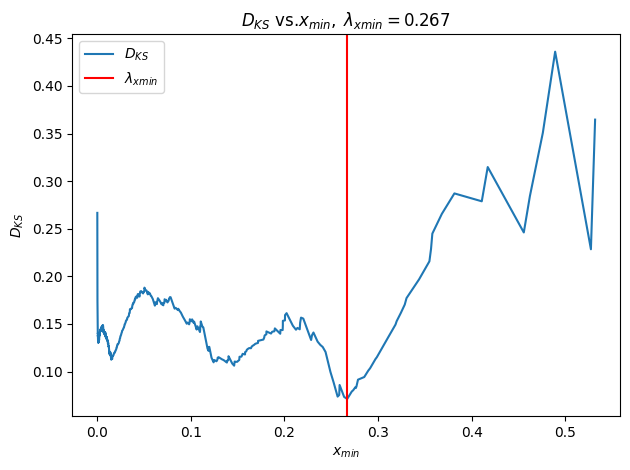

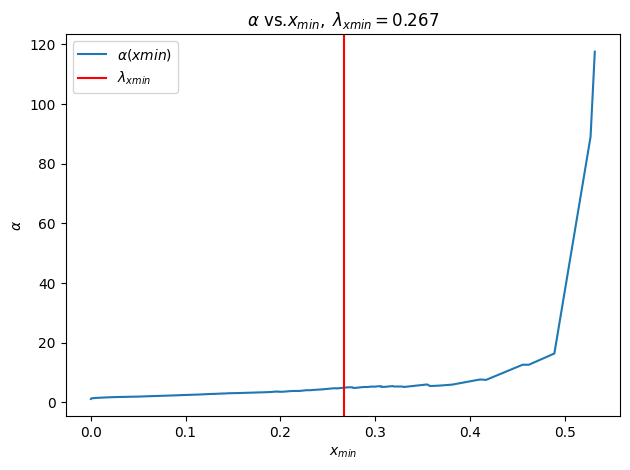

INFO:weightwatcher:keras layer: block2_pool <MaxPooling2D name=block2_pool, built=True>  type unknown not found 
INFO:weightwatcher:Running powerlaw.Fit no xmin, xmax=None. distribution=power_law pl_package=ww
INFO:weightwatcher:PL FIT running NEW power law method


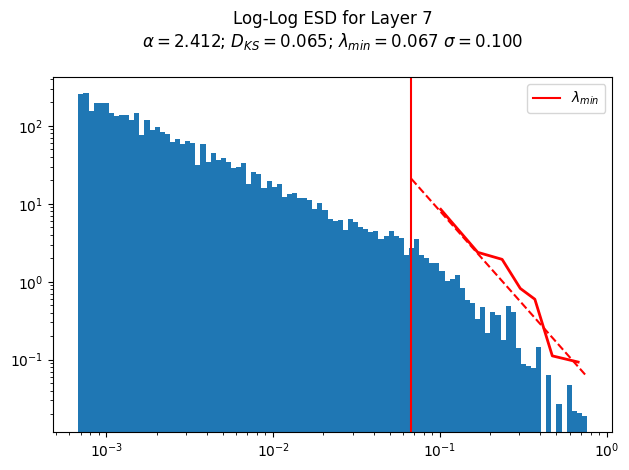

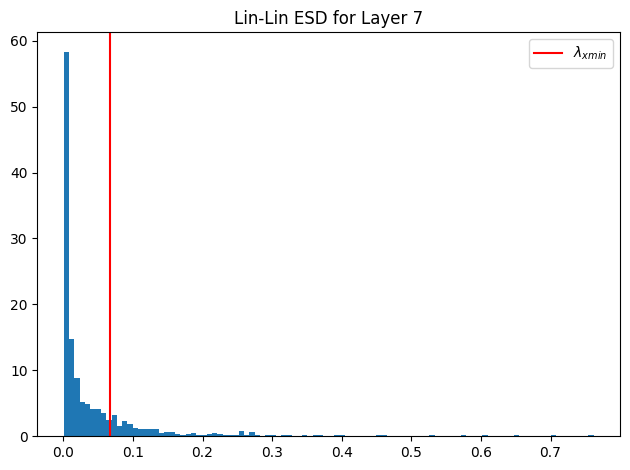

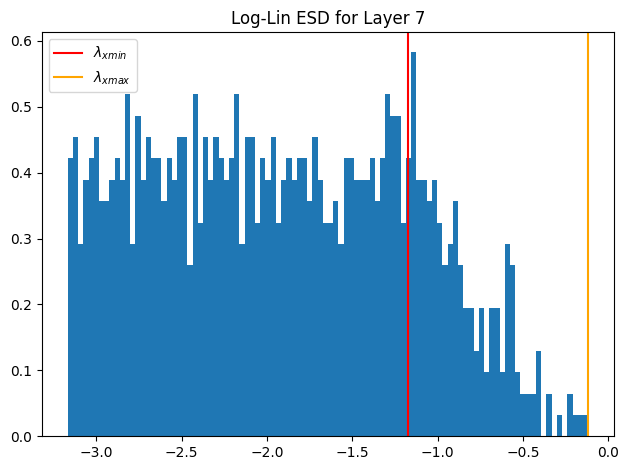

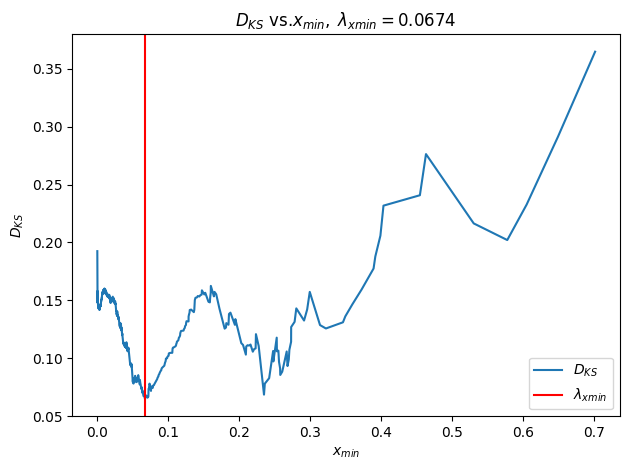

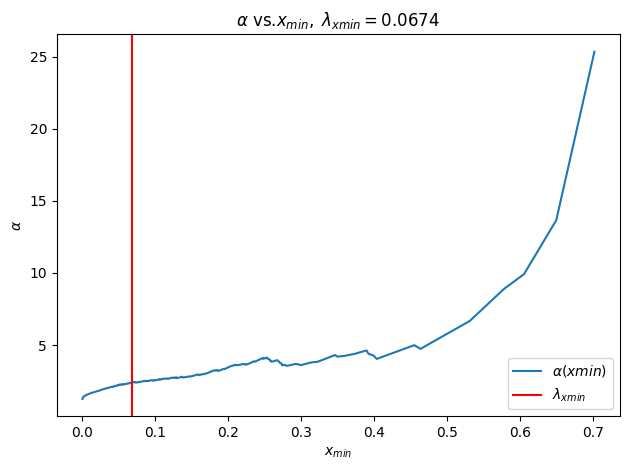

INFO:weightwatcher:Running powerlaw.Fit no xmin, xmax=None. distribution=power_law pl_package=ww
INFO:weightwatcher:PL FIT running NEW power law method


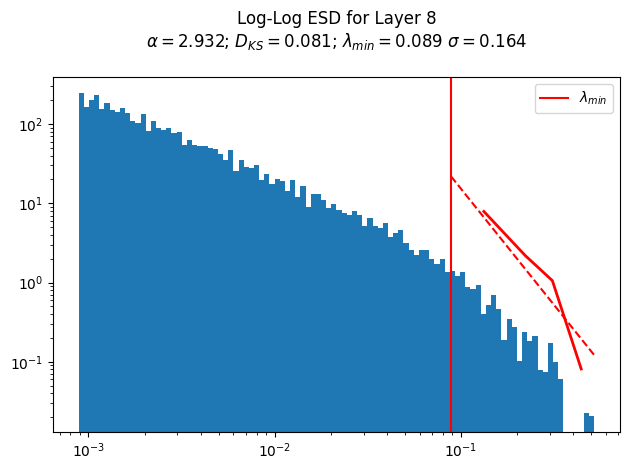

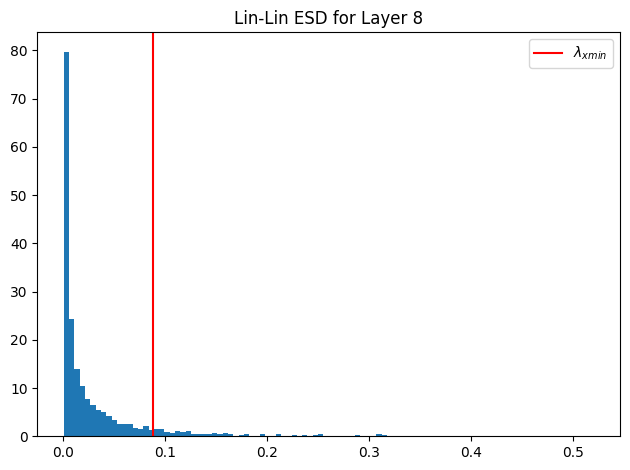

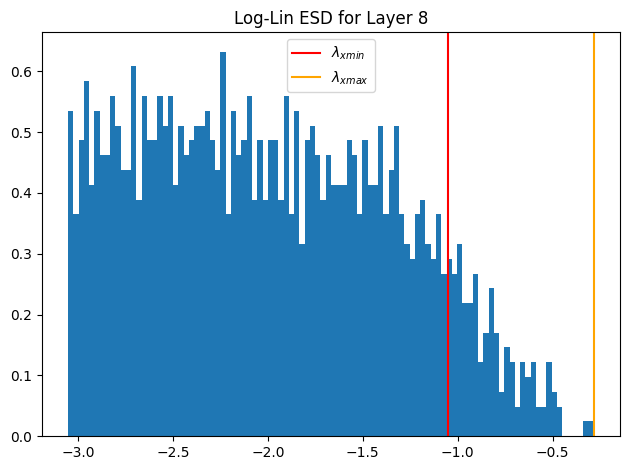

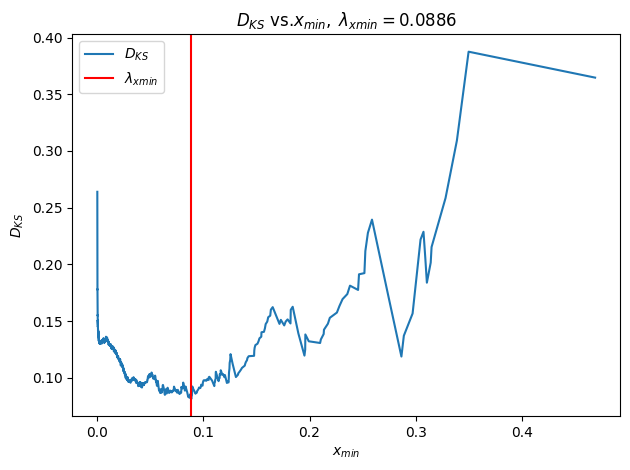

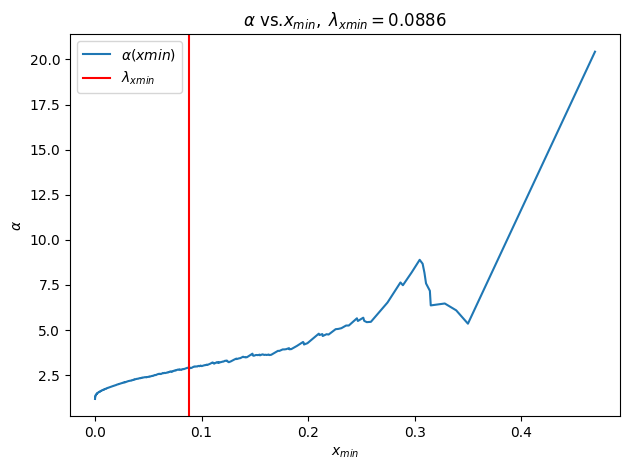

INFO:weightwatcher:Running powerlaw.Fit no xmin, xmax=None. distribution=power_law pl_package=ww
INFO:weightwatcher:PL FIT running NEW power law method


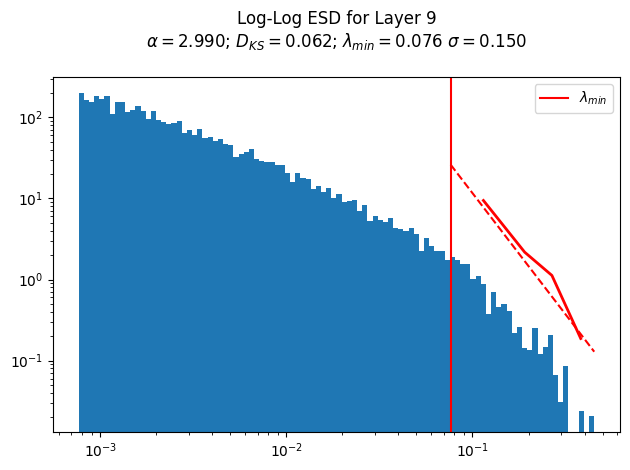

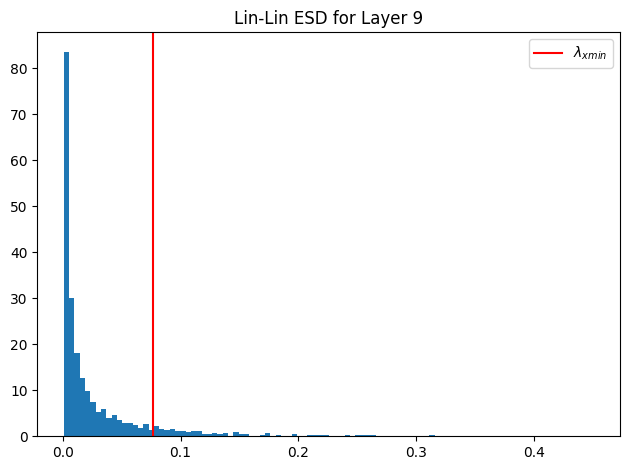

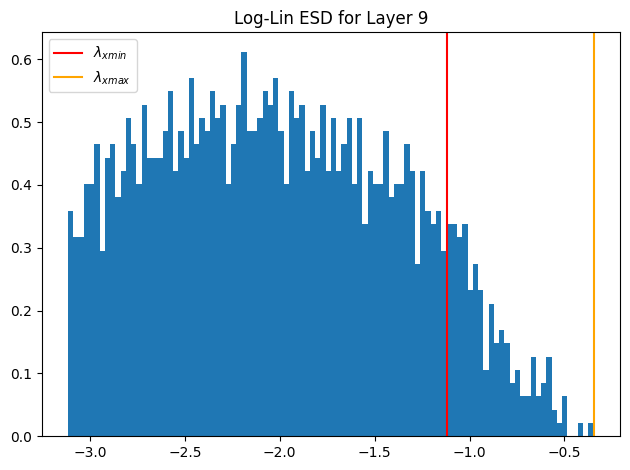

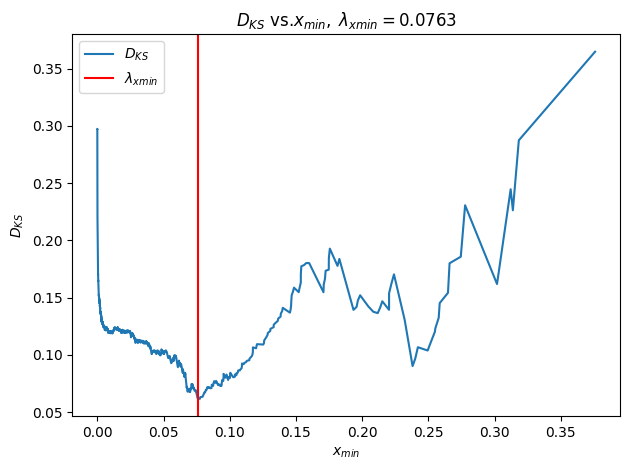

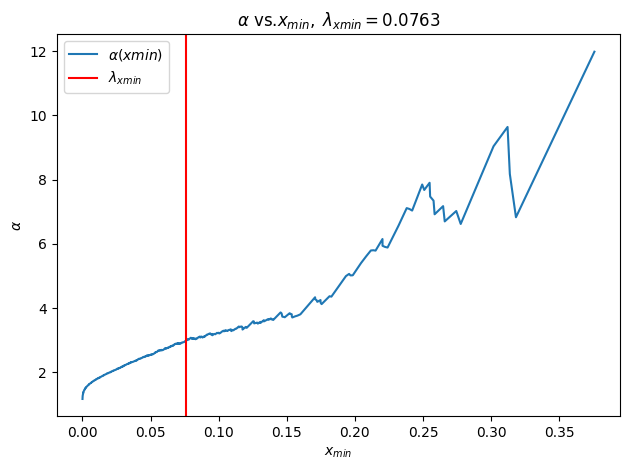

INFO:weightwatcher:keras layer: block3_pool <MaxPooling2D name=block3_pool, built=True>  type unknown not found 
INFO:weightwatcher:Running powerlaw.Fit no xmin, xmax=None. distribution=power_law pl_package=ww
INFO:weightwatcher:PL FIT running NEW power law method


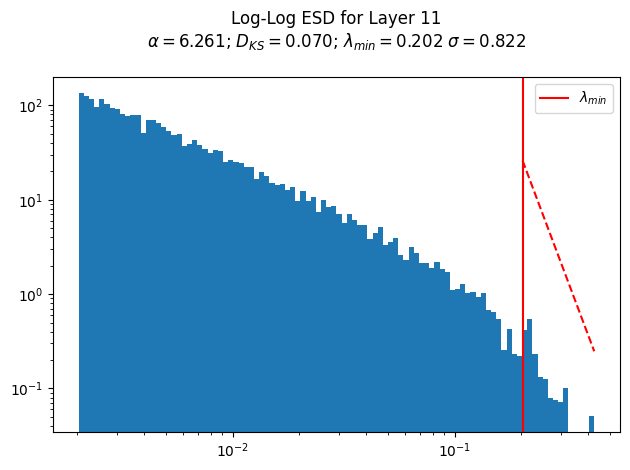

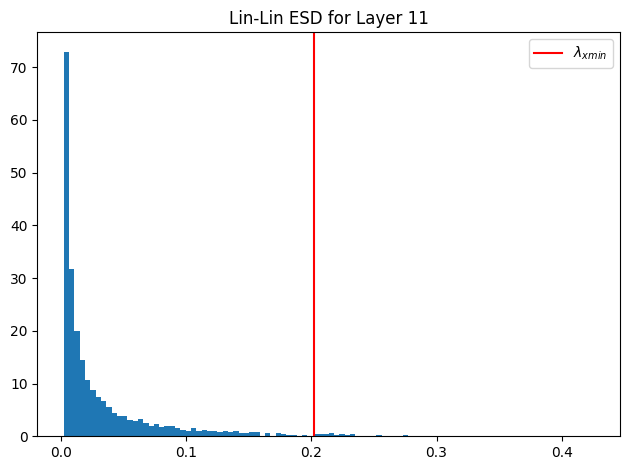

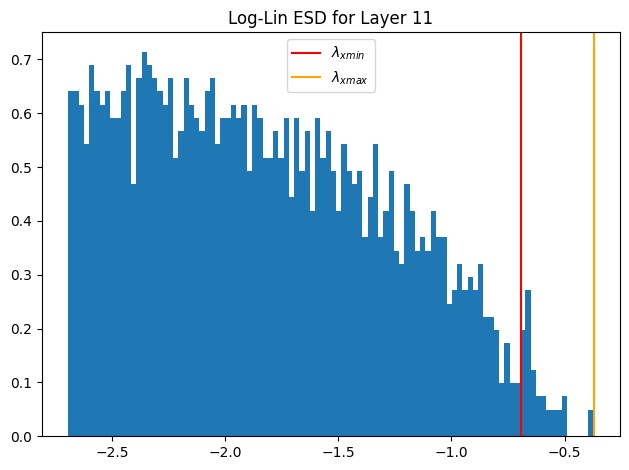

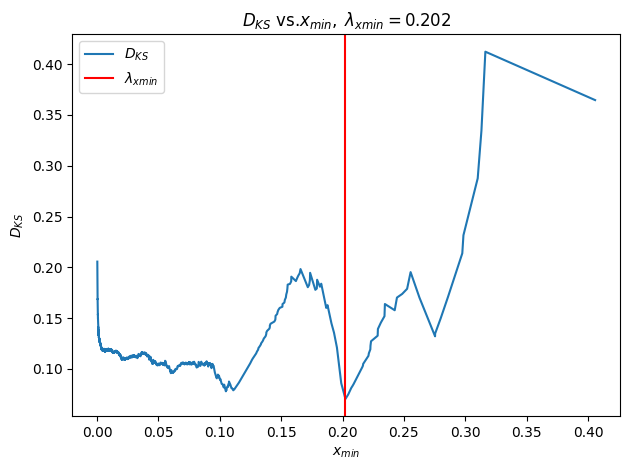

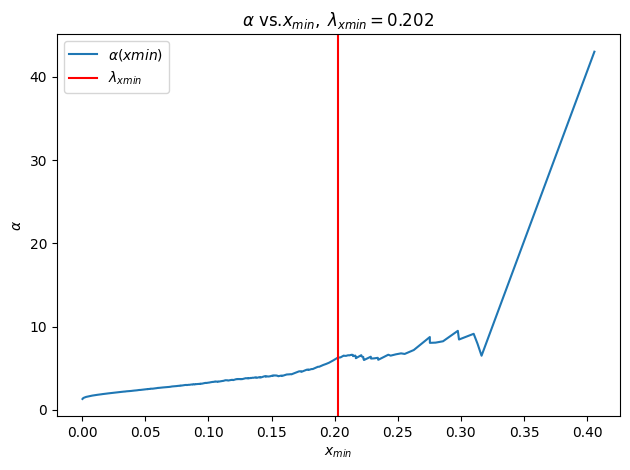

INFO:weightwatcher:Running powerlaw.Fit no xmin, xmax=None. distribution=power_law pl_package=ww
INFO:weightwatcher:PL FIT running NEW power law method


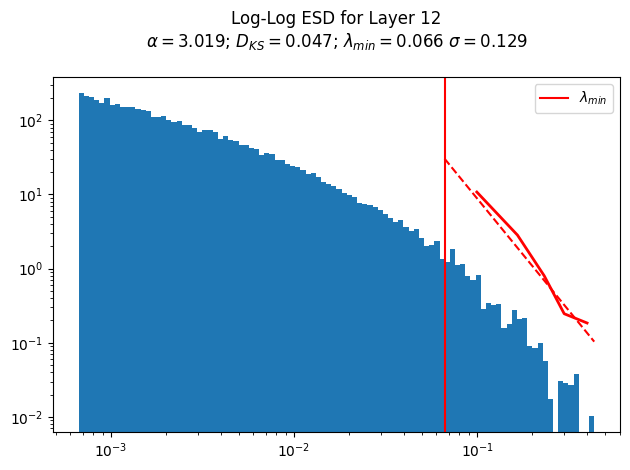

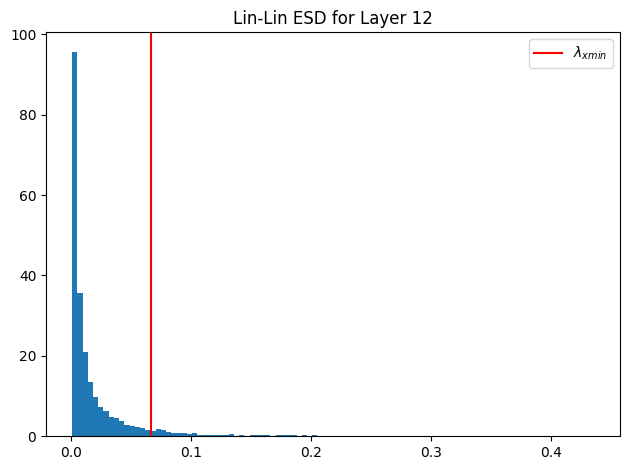

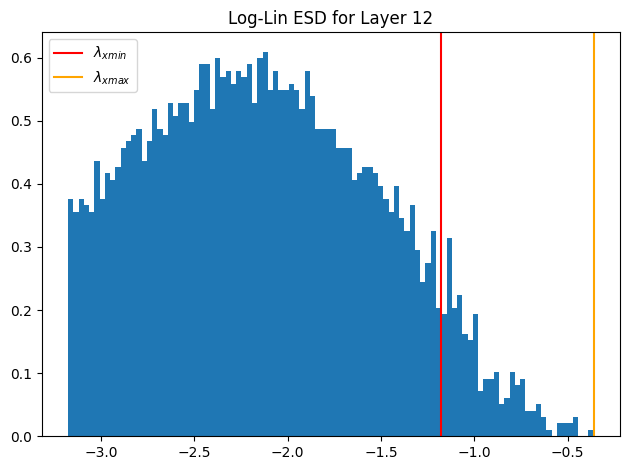

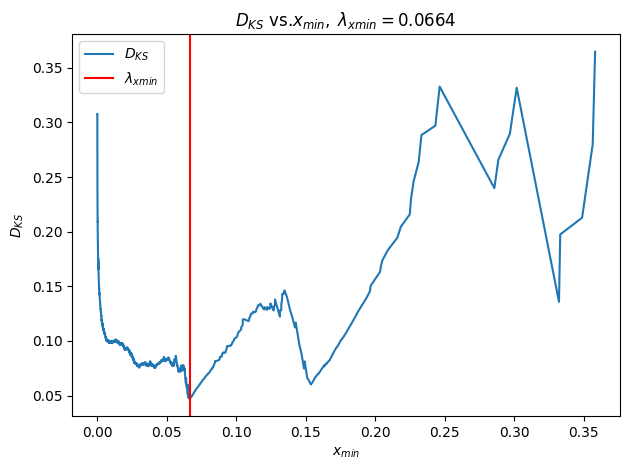

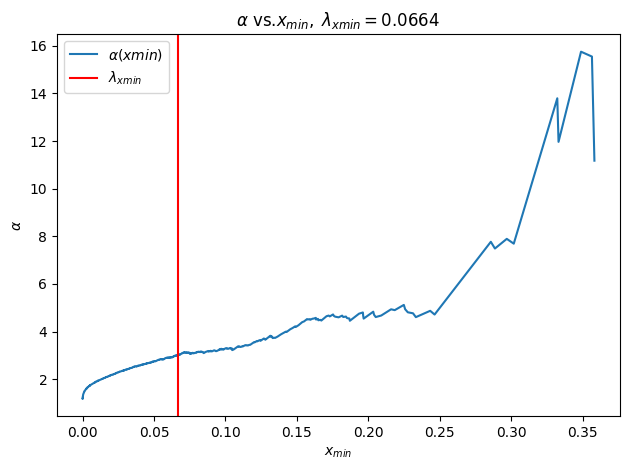

INFO:weightwatcher:Running powerlaw.Fit no xmin, xmax=None. distribution=power_law pl_package=ww
INFO:weightwatcher:PL FIT running NEW power law method


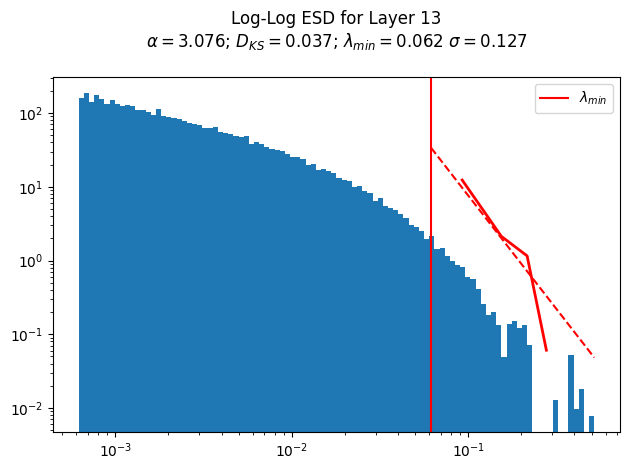

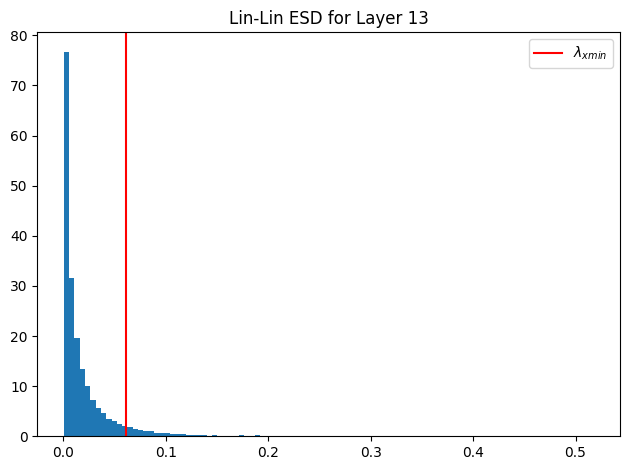

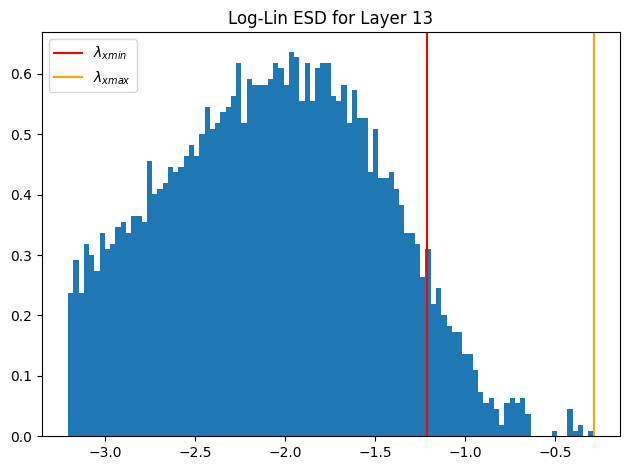

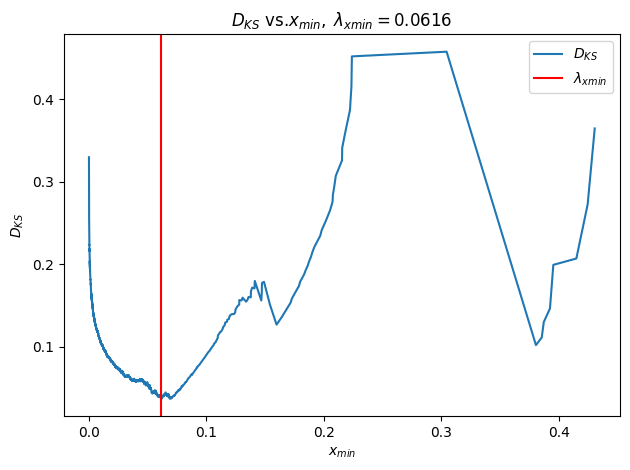

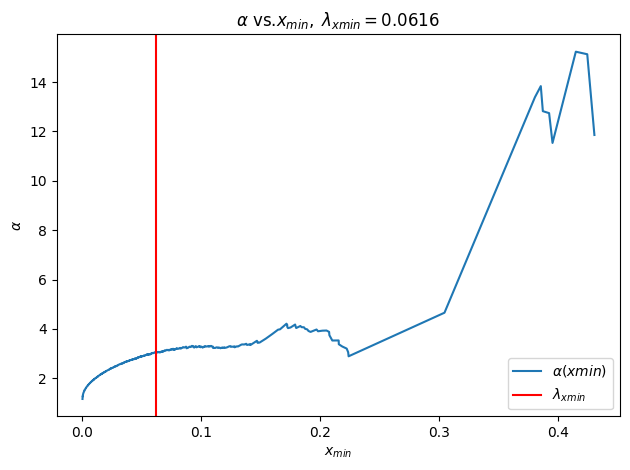

INFO:weightwatcher:keras layer: block4_pool <MaxPooling2D name=block4_pool, built=True>  type unknown not found 
INFO:weightwatcher:Running powerlaw.Fit no xmin, xmax=None. distribution=power_law pl_package=ww
INFO:weightwatcher:PL FIT running NEW power law method


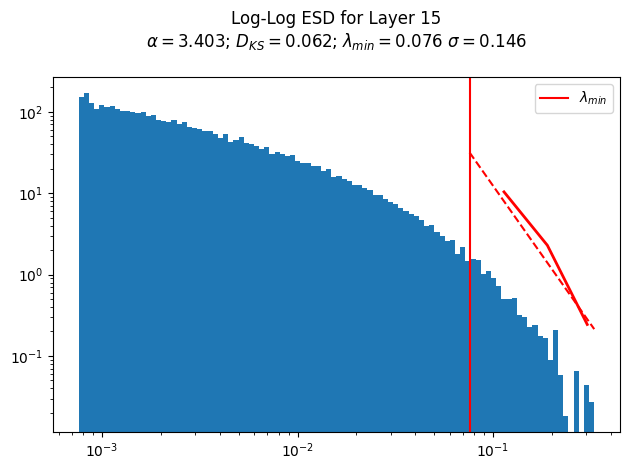

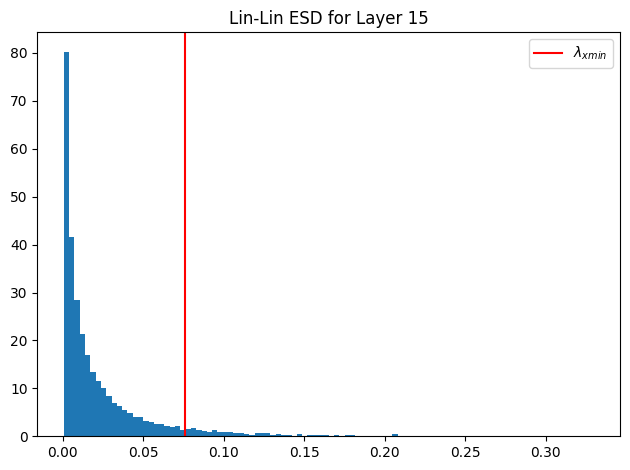

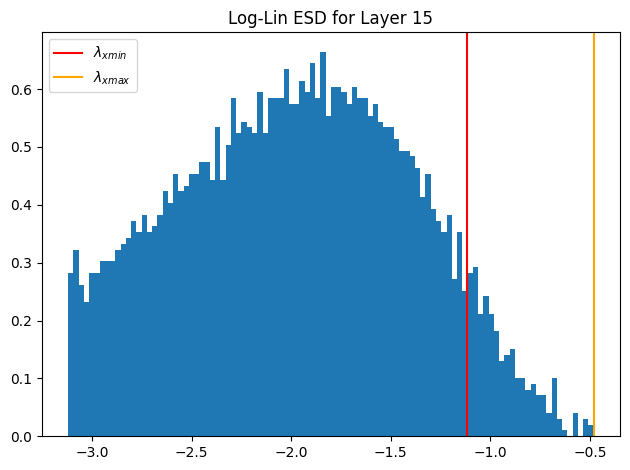

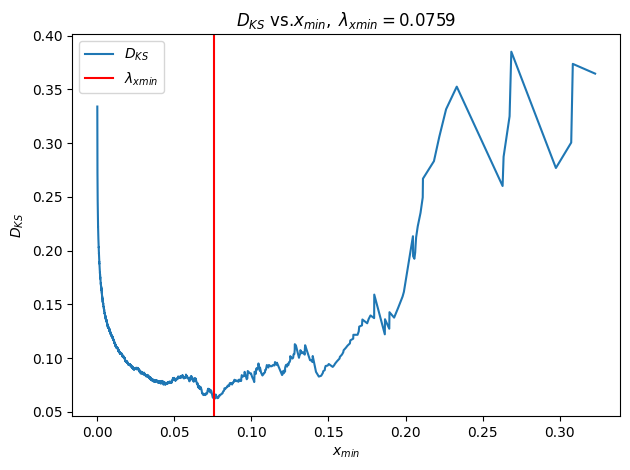

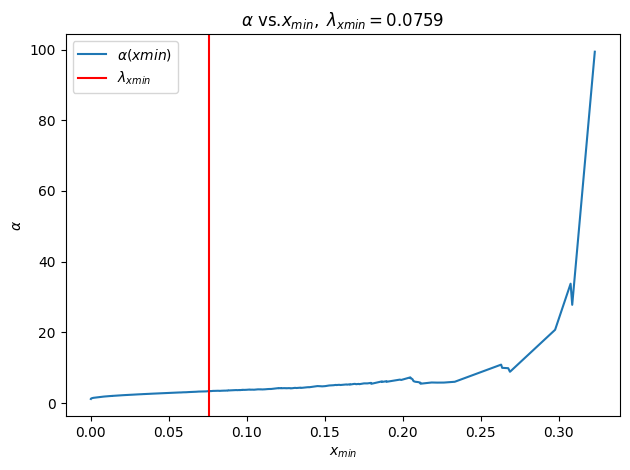

INFO:weightwatcher:Running powerlaw.Fit no xmin, xmax=None. distribution=power_law pl_package=ww
INFO:weightwatcher:PL FIT running NEW power law method


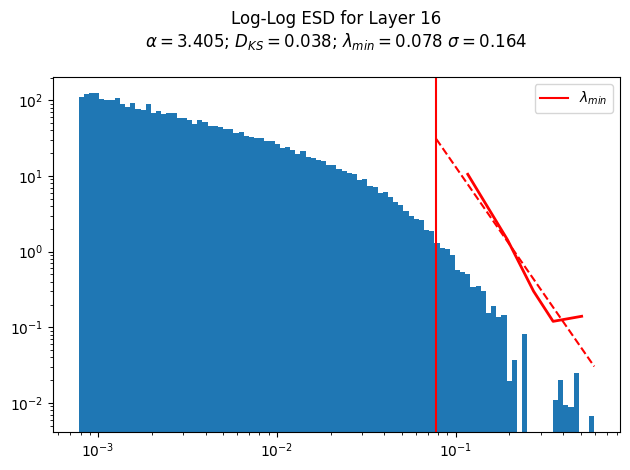

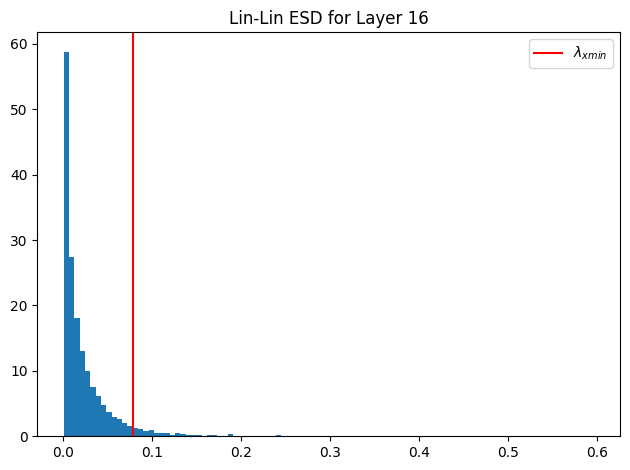

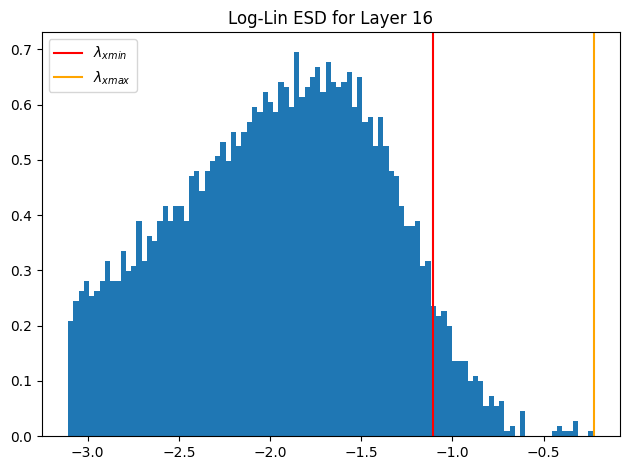

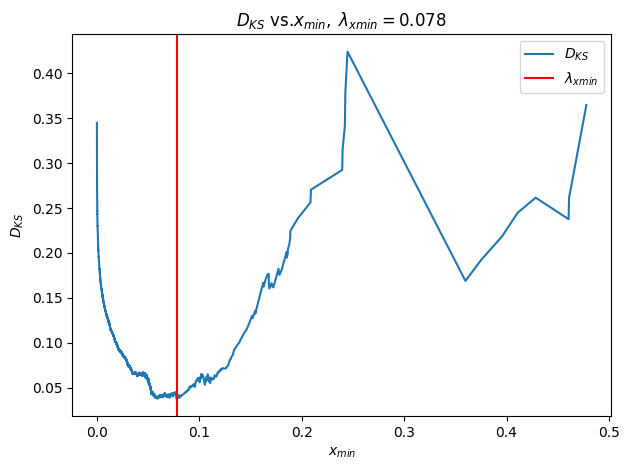

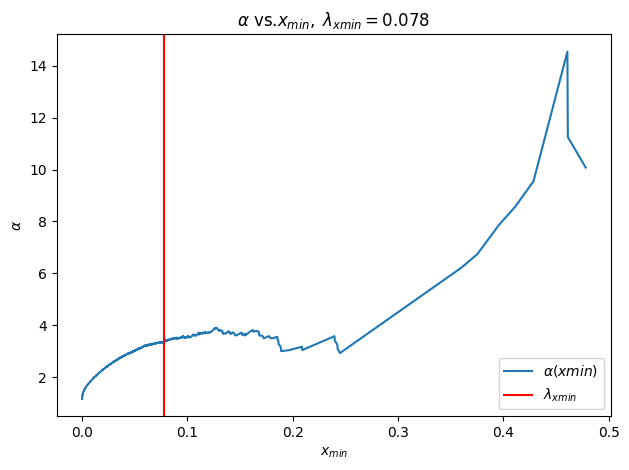

INFO:weightwatcher:Running powerlaw.Fit no xmin, xmax=None. distribution=power_law pl_package=ww
INFO:weightwatcher:PL FIT running NEW power law method


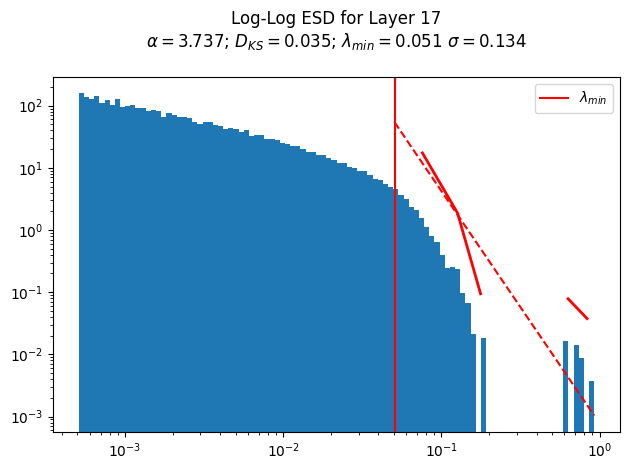

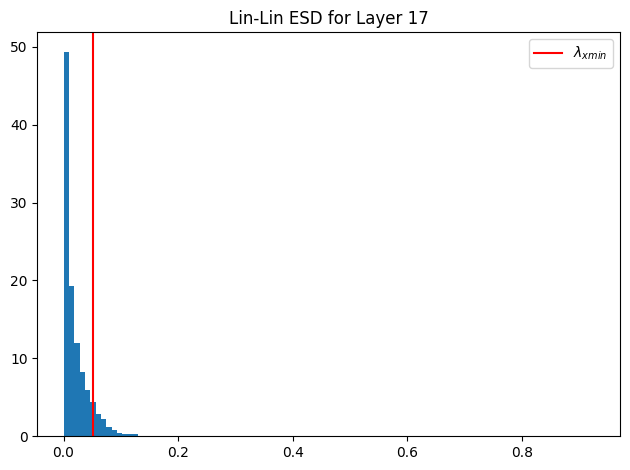

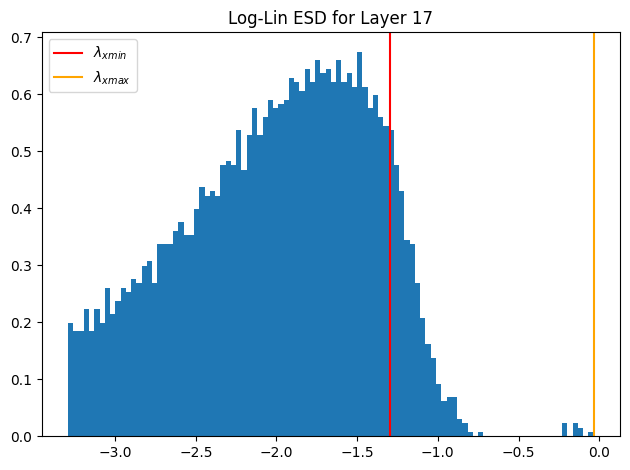

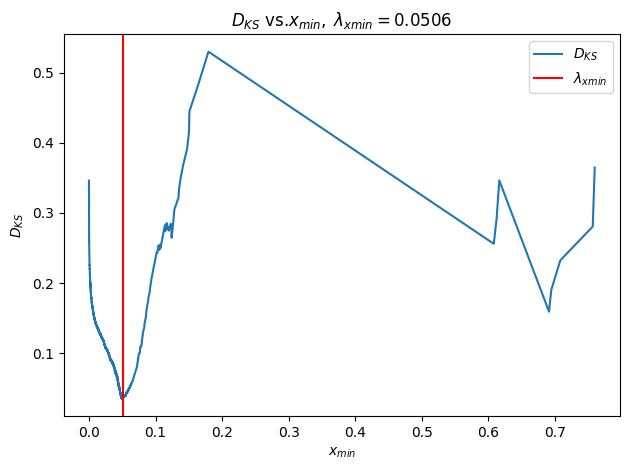

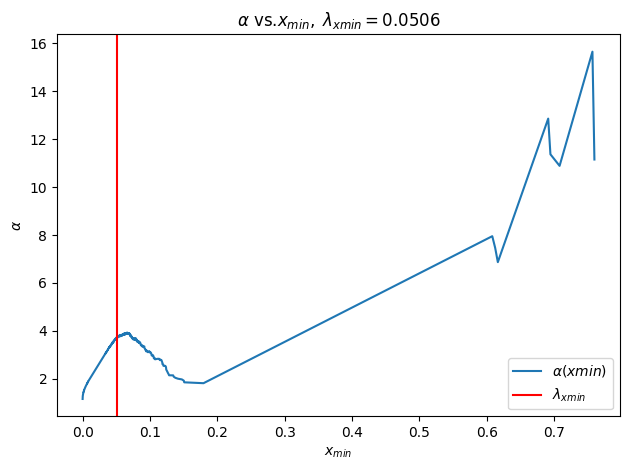

INFO:weightwatcher:keras layer: block5_pool <MaxPooling2D name=block5_pool, built=True>  type unknown not found 
INFO:weightwatcher:keras layer: flatten <Flatten name=flatten, built=True>  type flattened not found 
INFO:weightwatcher:Running powerlaw.Fit no xmin, xmax=None. distribution=power_law pl_package=ww
INFO:weightwatcher:PL FIT running NEW power law method


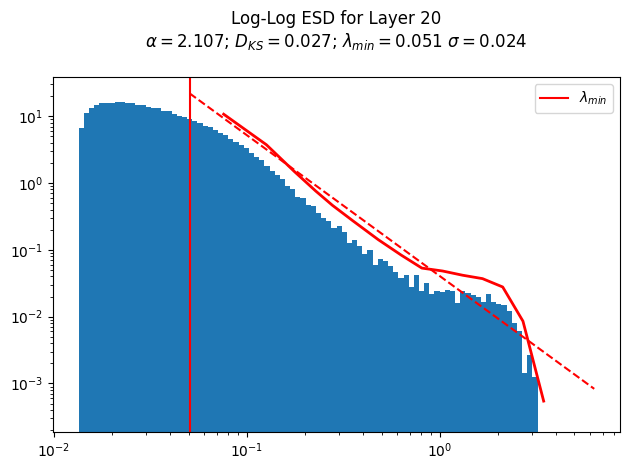

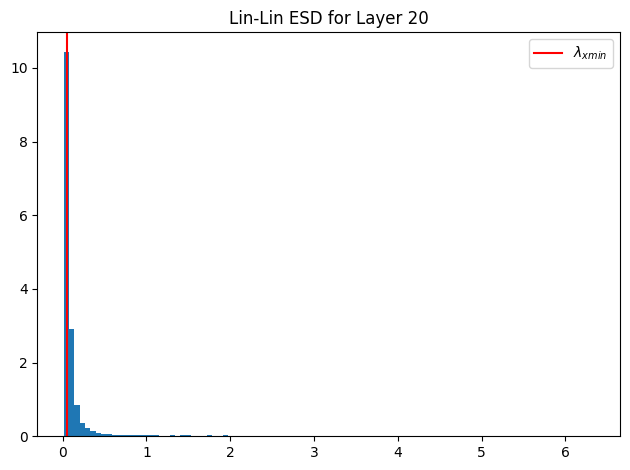

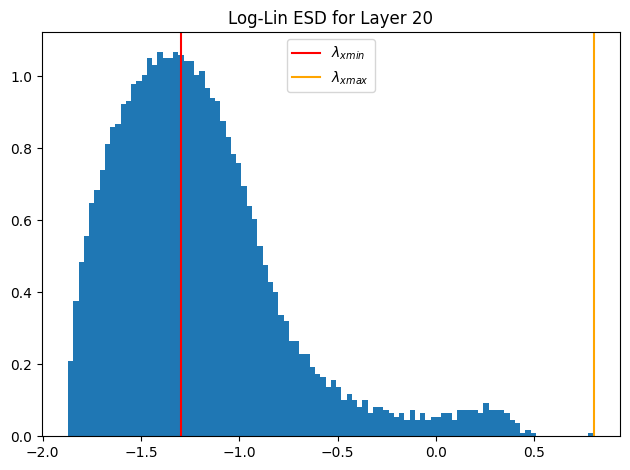

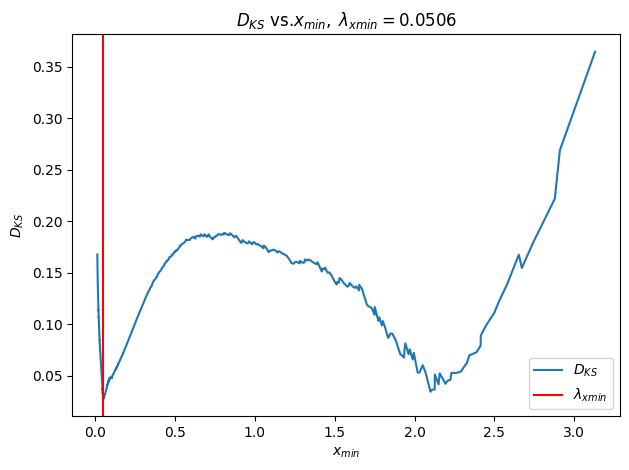

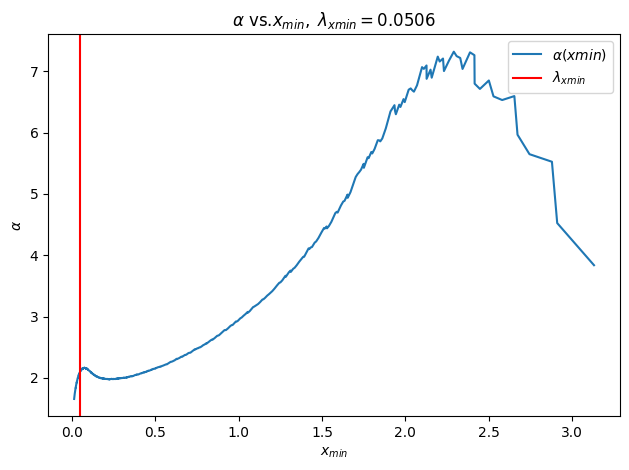

INFO:weightwatcher:Running powerlaw.Fit no xmin, xmax=None. distribution=power_law pl_package=ww
INFO:weightwatcher:PL FIT running NEW power law method


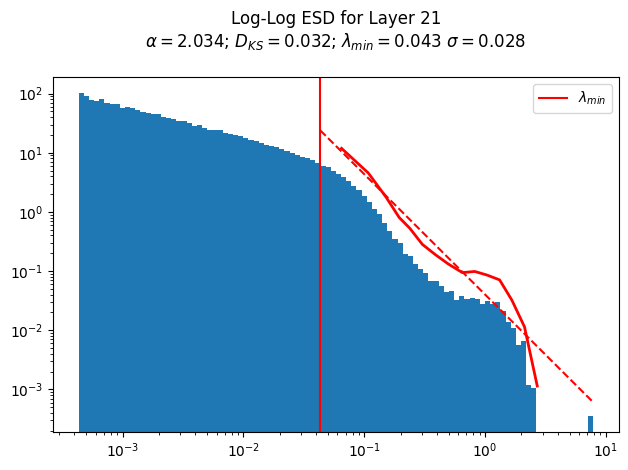

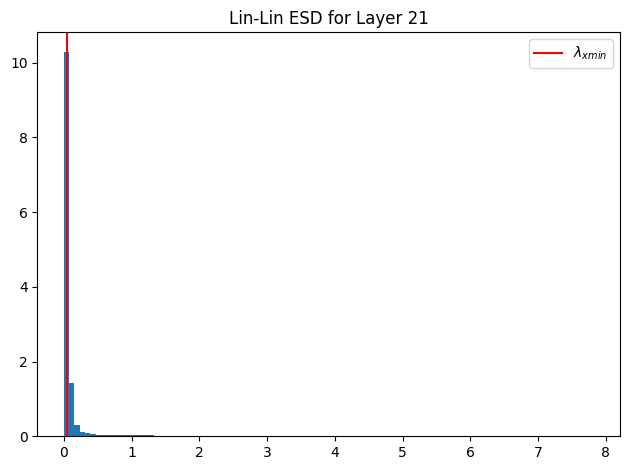

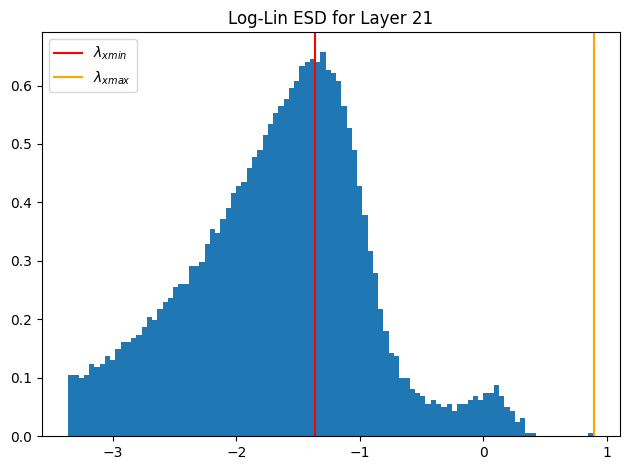

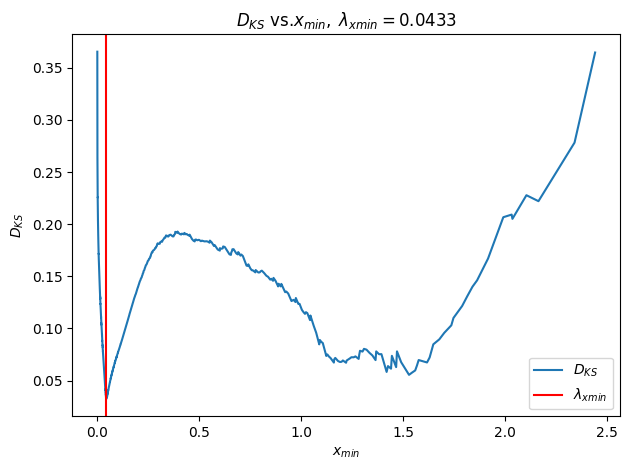

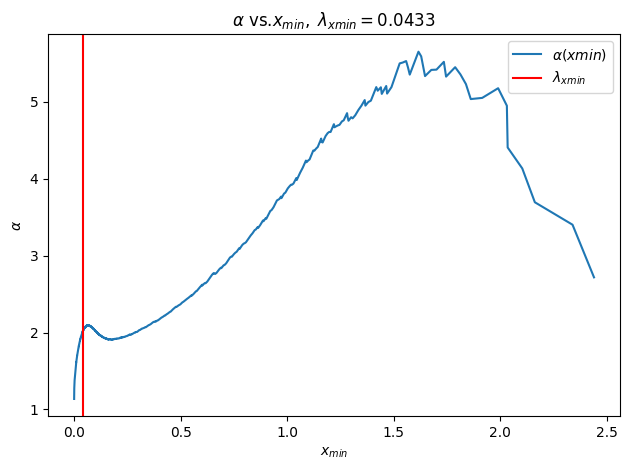

INFO:weightwatcher:Running powerlaw.Fit no xmin, xmax=None. distribution=power_law pl_package=ww
INFO:weightwatcher:PL FIT running NEW power law method


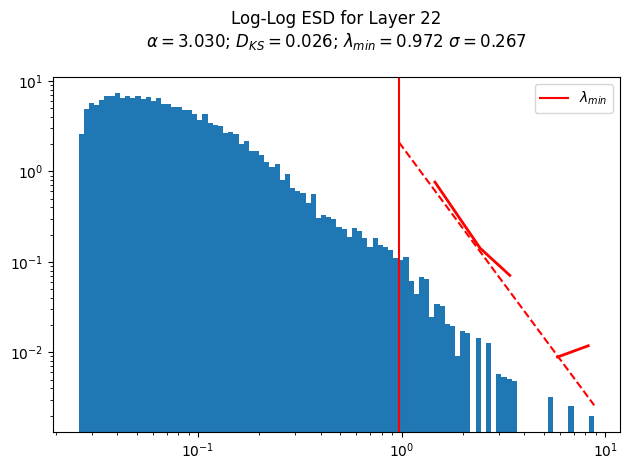

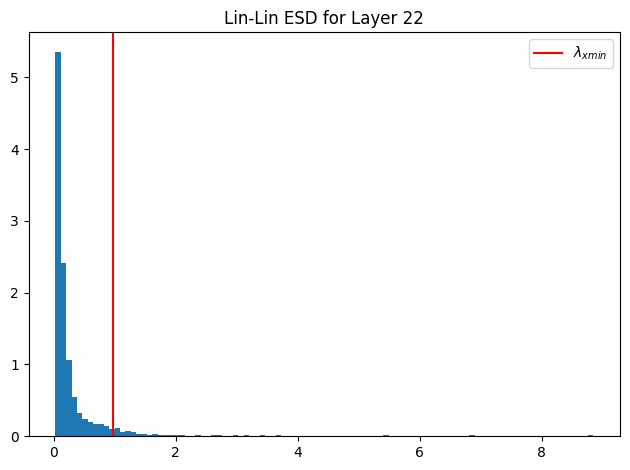

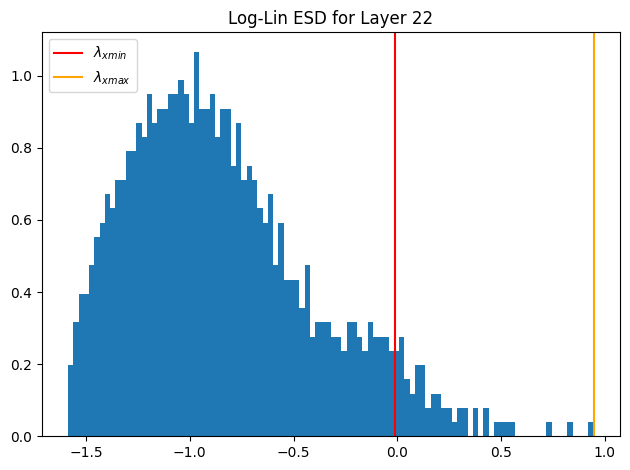

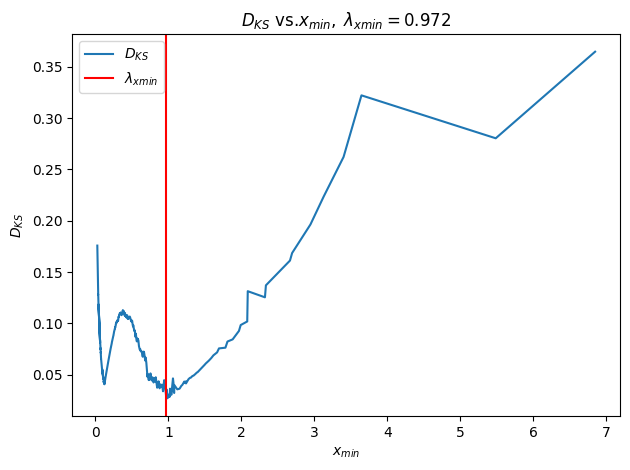

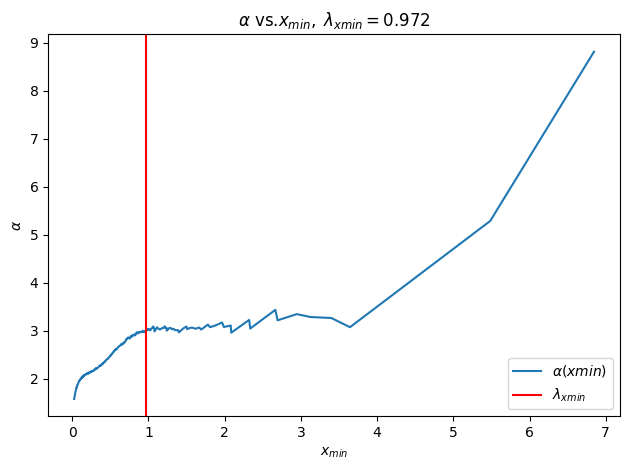

<Figure size 640x480 with 0 Axes>

In [12]:
watcher = ww.WeightWatcher(model=model)
details = watcher.analyze(plot=True)

## 2.5 Debug and Custom Logging

In [13]:
logger = logging.getLogger(ww.__name__)
logger.setLevel(logging.DEBUG)

watcher = ww.WeightWatcher(model=model)
details = watcher.analyze()

INFO:weightwatcher:

python      version 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
numpy       version 1.26.4
tensorflow version 2.17.0

INFO:weightwatcher:

python      version 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
numpy       version 1.26.4
tensorflow version 2.17.0

DEBUG:weightwatcher:params {'glorot_fix': False, 'normalize': False, 'conv2d_norm': True, 'randomize': False, 'savedir': 'ww-img', 'savefig': 'ww-img', 'rescale': True, 'plot': False, 'deltaEs': False, 'intra': False, 'channels': None, 'fft': False, 'conv2d_fft': False, 'ww2x': False, 'pool': True, 'vectors': False, 'smooth': None, 'stacked': False, 'svd_method': 'fast', 'fix_fingers': False, 'fit': 'PL', 'MAX_FINGERS': 10, 'finger_thresh': 1.0, 'sparsify': True, 'detX': False, 'mp_fit': False, 'min_evals': 10, 'max_evals': 15000, 'max_N': 50000, 'tolerance': 1e-06, 'layer_ids_start': 0, 'add_biases': False, 'xmin_max': None, 'pl_package': 'ww', 'xmax': None, 'peft': False, 'inverse': False, 'glorot

## 3. pyTorch Models

In [14]:
import torchvision.models as models

model = models.vgg16(pretrained=True)
watcher = ww.WeightWatcher(model=model)

details = watcher.analyze()
summary =  watcher.get_summary(details)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 110MB/s]
INFO:weightwatcher:

python      version 3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]
numpy       version 1.26.4
torch version 2.3.1+cu121
INFO:weightwatcher:

python      version 3.10.12 (main, Jul 2